**GtHub has limited rendering capabilities in the default viewer** (unappealing tables and complete lack of figures). **If you are using it now, please switch to the external view with nbviewer ($\ominus$ icon in the top-right corner).**

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 1123

<IPython.core.display.Javascript object>

# Promotion periods sales performance comparison for a SAMPLE BOOK
In this notebook I show an analysis I performed recently. The main aim of this file is to show my approach to solve different problems, including the relevant Python code. Consequently the notebook is not designed to show the analysis outcome in the most effective manner. Nonetheless, the last section contains a conclusion with references to generated Figures.

The goal of the analysis is to evaluate a SAMPLE BOOK sales performance on a book-selling platform during two analogous discount periods. The foundation of the analysis is a single dataset provided with a minimal description. The presented order of actions is a reconstruction of my approach to complete the task.

The Python code is organized and formatted to make the notebook easier to read, therefore it is not PEP-8 compliant. Especially imports are not clustered at the beginning, but appear in code-cells that first utilize a certain module.

##### Contents:
1. [Checking and cleaning the data](#Checking-and-cleaning-the-data)
2. [Sale 1: performance analysis](#Sale-1:-performance-analysis)
3. [Sale 1: performance in individual countries](#Sale-1:-performance-in-individual-countries)
4. [Sale 2: data analysis and cleaning](#Sale-2:-data-analysis-and-cleaning)
5. [Sale 2: performance analysis](#Sale-2:-performance-analysis)
6. [Sale 2: performance in individual countries](#Sale-2:-performance-in-individual-countries)
7. [Conclusion](#Conclusion)

###### Skill highlights:
- Python programming: all code cells
- Data cleaning: [here](#Checking-and-cleaning-the-data) and [here](#Sale-2:-data-analysis-and-cleaning)
- Data visualization<a id=dataviz></a>: [rich hover-info](#Figure-12), [choropleths in tabs](#Figure-7), [very complex graph](#Figure-11), and all other plots
- Statistical inference: [hypothesis testing](#ref-fig-3-1)
- Simple unstructured data mining/preparation/joining: [here](#Sale-1:-performance-in-individual-countries)

## Checking and cleaning the data

Let's first load the data into a pandas dataframe and have a look at it. It is contained in an Excel file and has data information, so we use `read_excel()` method with `parse_dates=True`.

Unfortunately, I am not allowed to publicly share the file, even though the dataset has been anonymized.

In [2]:
import pandas as pd
data = pd.read_excel('sales.xlsx', parse_dates=True)
display(data.head(10))

,Date,Country,Country Code,Region,Package,Product(ID#),Product Name,Type,Base Price,Sale Price,Currency,Gross Units Sold,Returns,Net Units Sold,Gross Sales (USD),Returns (USD),VAT/Tax (USD),Net Sales (USD)
0,2016-12-01,Australia,AU,Oceania,-1,12345,SAMPLE BOOK,Direct,7.5,5.10,USD,0,2,-2,0.00000,10.19400,0.00000,-10.19400
1,2016-12-01,Australia,AU,Oceania,-1,12345,SAMPLE BOOK,Direct,7.5,7.50,USD,6,0,6,44.98200,0.00000,0.00000,44.98200
2,2016-12-01,Austria,AT,Western Europe,-1,12345,SAMPLE BOOK,Direct,6.9,4.69,EUR,0,2,-2,0.00000,9.95394,1.66218,-8.29176
3,2016-12-01,Canada,CA,North America,-1,12345,SAMPLE BOOK,Direct,10.5,8.92,CAD,2,0,2,13.36200,0.00000,0.00000,13.36200
4,2016-12-01,Canada,CA,North America,-1,12345,SAMPLE BOOK,Direct,10.5,10.50,CAD,3,0,3,23.74200,0.00000,0.00000,23.74200
5,2016-12-01,China,CN,Asia,-1,12345,SAMPLE BOOK,Direct,23.4,15.90,CNY,0,10,-10,0.00000,23.13000,0.00000,-23.13000
6,2016-12-01,China,CN,Asia,-1,12345,SAMPLE BOOK,Direct,23.4,23.40,CNY,2,0,2,6.80526,0.00000,0.00000,6.80526
7,2016-12-01,Czech Republic,CZ,Eastern Europe,-1,12345,SAMPLE BOOK,Direct,6.9,4.69,EUR,0,2,-2,0.00000,9.95394,1.72584,-8.22810
8,2016-12-01,Denmark,DK,Western Europe,-1,12345,SAMPLE BOOK,Direct,6.9,6.90,EUR,3,0,3,22.14450,0.00000,-4.43079,17.71371
9,2016-12-01,France,FR,Western Europe,-1,12345,SAMPLE BOOK,Direct,6.9,6.90,EUR,5,0,5,36.56700,0.00000,-6.09183,30.47517


This is a daily sales report for a SAMPLE BOOK containing: Gross Units Sold, Returns, Net Units Sold, with corresponding USD revenue information. Daily data is divided based on a Country of purchase and Sale Price.

I begin with checking the contents for missing values and to see if the data types match the column contents.

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5449 non-null   datetime64[ns]
 1   Country            5449 non-null   object        
 2   Country Code       5449 non-null   object        
 3   Region             5449 non-null   object        
 4   Package            5449 non-null   int64         
 5   Product(ID#)       5449 non-null   int64         
 6   Product Name       5449 non-null   object        
 7   Type               5449 non-null   object        
 8   Base Price         5449 non-null   float64       
 9   Sale Price         5449 non-null   float64       
 10  Currency           5449 non-null   object        
 11  Gross Units Sold   5449 non-null   int64         
 12  Returns            5449 non-null   int64         
 13  Net Units Sold     5449 non-null   int64         
 14  Gross Sa

None

It appears that this dataset is squeaky clean with no missing values and appropriate data types for each column.

I check the number of unique values for each column, as it appears that some of them contain unnecessary information and can be dropped.

In [4]:
display(data.nunique())

Date                  124
Country               127
Country Code          127
Region                 11
Package                 1
Product(ID#)            1
Product Name            1
Type                    1
Base Price             42
Sale Price            142
Currency               38
Gross Units Sold      214
Returns                64
Net Units Sold        229
Gross Sales (USD)    2500
Returns (USD)         874
VAT/Tax (USD)        1825
Net Sales (USD)      2824
dtype: int64

The **Package**, **Product(ID#)**, **Product Name**, and **Type** columns can be removed from further analysis.

In [5]:
data.drop(labels=['Package', 'Product(ID#)', 'Product Name', 'Type'], axis='columns', inplace=True)
display(data.head())

,Date,Country,Country Code,Region,Base Price,Sale Price,Currency,Gross Units Sold,Returns,Net Units Sold,Gross Sales (USD),Returns (USD),VAT/Tax (USD),Net Sales (USD)
0,2016-12-01,Australia,AU,Oceania,7.5,5.10,USD,0,2,-2,0.000,10.19400,0.00000,-10.19400
1,2016-12-01,Australia,AU,Oceania,7.5,7.50,USD,6,0,6,44.982,0.00000,0.00000,44.98200
2,2016-12-01,Austria,AT,Western Europe,6.9,4.69,EUR,0,2,-2,0.000,9.95394,1.66218,-8.29176
3,2016-12-01,Canada,CA,North America,10.5,8.92,CAD,2,0,2,13.362,0.00000,0.00000,13.36200
4,2016-12-01,Canada,CA,North America,10.5,10.50,CAD,3,0,3,23.742,0.00000,0.00000,23.74200


I can now do some plotting. Looking at **Gross Units Sold**, **Returns**, **Net Units Sold** is a good starting point. However, each of these columns should be grouped by **Date** and summed, to avoid plotting unnecessary information with unclear relationship. I am using plotly for it's fancy interactive capabilities.

In [6]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objects as go
from IPython.core.display import HTML

fig = go.Figure()
to_plot = ['Gross Units Sold', 'Returns', 'Net Units Sold']
sum_vs_t = data.groupby(['Date'])[to_plot].sum().reset_index()
for what in to_plot:
    fig.add_trace(go.Scatter(x=sum_vs_t['Date'],
                             y=sum_vs_t[what],
                             mode='lines',
                             name=what+' (total)',
                             hovertemplate='<b>%{x}, ' + what + ' (total): %{y}'
                            ))
# add a title and axis labels
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Units',
                  title_text='First look at the data',
                  title_x=0.5,
                 )
# add a reference point for this figure on the right
display(HTML('<p style="text-align: right;"><a id="Figure-1">Figure 1</a></p>'))
fig.show()

Notice that I added a custom hover template for easier interpretation of the hover output.

It can be seen from the plot that there are two separate periods included in the data. Both contain dates between 1st December and 31st January, but for consecutive year couples (2016/2017 and 2017/2018). I will be comparing these two periods for their performance, so it is a good idea to separate them into different dataframes (using `copy()` to limit mistake opportunities and warning messages).

In [7]:
sales = {1: data[data['Date'] < '07-2017'].copy(), 2: data[data['Date'] > '07-2017'].copy()}

from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

for sale_n in [1, 2]:
    sum_vs_t = sales[sale_n].groupby(['Date'])[to_plot].sum().reset_index()
    for what in to_plot:
        fig.add_trace(go.Scatter(x=sum_vs_t['Date'],
                                 y=sum_vs_t[what],
                                 mode='lines',
                                 name=what+' (total), sale'+str(sale_n),
                                 hovertemplate='<b>%{x}, ' + what + ' (total): %{y}'
                                ),
                      row=1, col=sale_n
                     )
# add axis labels and a title
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Units", row=1, col=1)
fig.update_layout(title_text='First look at the data', title_x=0.5)
# add a reference point for this figure on the right
display(HTML('<p style="text-align: right;"><a id="Figure-2">Figure 2</a></p>'))
fig.show()

We can clearly see a several-days-long spikes in both periods. These must indicate the promotions. Plotting data grouped by discounts should confirm this assumption. I will begin with calculating a discount for each row and store it in a **discount** column.

In the book selling platform, a promotion discount is applied wolrdwide, but since the **Sale Price** and **Base Price** values are recorded in different currencies (depending on a country), I aggregate the calculated values. A simple yet effective approach is to use `round()`.

In [8]:
sales[1]['discount'] = sales[1].apply(
    lambda r: round(100 - (r['Sale Price'] / r['Base Price']) * 100),
    axis=1
)

I can now check the **discounts** calculated for the first period:

In [9]:
display(sales[1]['discount'].unique())

array([32,  0, 15, 50, 40, 20, 33, 42, 41, 75, 77, 53, 74], dtype=int64)

Surprisingly, there is quite a number of significantly different values. I was expecting to find 0, indicating full-price records, and a single other value for the main discount. Well, more values could appear due to the simplified aggregation, but not with such huge spread.

This situation requires further investigation. I will create a plot with **Gross Units Sold** for each **discount**. First I need a list of **discounts** ordered by their total **Gross Units Sold**, ignoring **Gross Units Sold** == 0 (in cases where a certain **discount** affects **Returns** and **Net Units Sold**, but not **Gross Units Sold**). This can be done by grouping **Gross Units Sold** by **discounts**, calculating their totals, sorting and extracting to a list.

In [10]:
discounts = sales[1][['discount', 'Gross Units Sold']].groupby(['discount']).sum()
discounts.sort_values('Gross Units Sold', ascending=False, inplace=True)
display(discounts)
# discounts.index holds 'discount' data and discounts.values contains GUS data
discounts = [disc for disc, GUS in zip(discounts.index, discounts.values) if GUS>0]
display(discounts)

,Gross Units Sold
discount,
32,51715
0,14066
50,397
42,326
15,72
75,68
74,10
41,4
53,4


[32, 0, 50, 42, 15, 75, 74, 41, 53, 77, 33]

Now I want to plot time series of total daily **Gross Units Sold** for each discount. But many of the discounts are missing data for some (or most) of the days within the range and we want to plot 0 in such cases. One way of fixing this is to create a dataframe containing all the dates of interest and **Gross Units Sold** values of 0. This dataframe can be then concatenated to the dataframe containing data for one discount. The following function will take care of this: 

In [11]:
dates_u = sales[1]['Date'].unique()  # we will need a list of unique dates

def fill_missing(data_in):
    # fill missing ['Date'] data with 0 in ['Gross Units Sold']
    all_dates_with_0 = pd.MultiIndex.from_product([dates_u, [0]], names=['Date', 'Gross Units Sold'])
    all_dates_with_0 = pd.DataFrame().reindex(all_dates_with_0).reset_index()
    return pd.concat([data_in, all_dates_with_0])

Now I need to aggregate the daily data. Aside from **Gross Units Sold**, I will also include information about the **countries** that contributed to each day, to be displayed when hovering over data points in the plot:

In [12]:
def to_plot(data_in):
    data_out = data_in.groupby(['Date']).agg(
        Countries=('Country', lambda cs: sorted(tuple(set([c for c in cs if type(c) == str])))),
        to_rename=('Gross Units Sold', 'sum')
        ).reset_index()
    data_out = data_out.rename(columns={'to_rename': 'sum Gross Units Sold'})
    data_out['Countries'] = data_out.apply(
        lambda r: ''.join([r['Countries'][i] + ', ' if (i + 1) % 10 else r['Countries'][i] + '<BR>'
                           for i in range(len(r['Countries']))
                          ]),
        axis=1
    )
    return data_out

If you are wondering what is going on in there, then let's first discuss the **countries** aggregation:
```
lambda cs: sorted(tuple(set([c for c in cs if type(c) == str])))
```
The `cs` provided to aggregation is a list of all the contributing **countries**, which consists of strings and `NaNs` introduced by the `fill_missing()` function. The `lambda` function removes `NaNs` (`if type(c) == str`) and duplicates (by converting to set `set`) and finally returns sorted list of unique **countries**.
This is further formatted in:
```
    data_out['Countries'] = data_out.apply(
        lambda r: ''.join([r['Countries'][i] + ', ' if (i + 1) % 10 else r['Countries'][i] + '<BR>'
                           for i in range(len(r['Countries']))
                          ]),
        axis=1
    )
```
where the list of strings is converted to a single string, in which the **countries** are separated with `', '`, or a line break `'<BR>'` after each group of 10 **countries**.

Ok, now I can finally plot the data!

In [13]:
fig = go.Figure()

temp_df = fill_missing(sales[1])
temp_df = fill_missing(temp_df)
temp_df = to_plot(temp_df)
# add a line for the total Gross Units Sold
fig.add_trace(go.Scatter(x=temp_df['Date'],
                         y=temp_df['sum Gross Units Sold'],
                         mode='lines',
                         name='total',
                         line_color='black',
                         line_dash='dash',
                         hovertemplate='<b>%{x}, Gross Units Sold (total): %{y}'
                        ))
# add lines for each discount
for disc in discounts:
    temp_df = sales[1].loc[(sales[1]['discount'] == disc) & (sales[1]['Gross Units Sold'] != 0)]
    temp_df = fill_missing(temp_df)
    temp_df = to_plot(temp_df)
    fig.add_trace(go.Scatter(
        x=temp_df['Date'],
        y=temp_df['sum Gross Units Sold'],
        mode='lines+markers',
        name=f'-{disc:.0f}%', customdata=temp_df[['Countries']],
        hovertemplate='<b>%{x}, Gross Units Sold (' + f'{disc:.0f}' + '% off): %{y}<BR><b>Countries</b>: %{customdata[0]}'
    ))
# add a title and axis labels
fig.update_layout(
    title_text='<b>Gross Units Sold</b> per <b>discount</b> during <b>Sale 1<b>',
    title_x=0.5,
    yaxis_title_text='Gross Units Sold',
    xaxis_title_text='Date',
)
# add a reference point for this figure on the right, and links to where the figure is referenced in the text
display(HTML('<p style="text-align: right;"><a id="Figure-3">Figure 3</a>, '
             'referenced: <a href="#ref-fig-3-1">1</a></p>'))
fig.show()

Looks good! You can click on the traces in the legend to toggle their visibility (double click to show only the selected trace).
You might be wondering why are am I filtering out **Gross Units Sold** == 0 while extracting the data for each **discount** and then I immediately fill it with zeros again:
```
temp_df = sales[1].loc[(sales[1]['discount'] == disc) & (sales[1]['Gross Units Sold'] != 0)]
```
There are two reasons for this:
1. The initial presence of zeros is inconsistent (would appear only if there is **Returns**/**Net Units Sold** data for any given day),
2. Not filtering these rows out would result in wrong **countries** being aggregated towards the hover-display (e.g. Someone returned the book with -40% **Sale Price** in Greenland, but noone bought it at this price in Greenland on the same day).

It is now visible when the main **discount** took place. It also appears that the full-price sales increased after the promotion. It will be useful to extract the dates of the beginning and end of the whole analyzed period, as well as the beginning and end date of the promotion itself. I store these dates in a dictionary `dates_sale1` and introduce them partially manually for simplicity:

In [14]:
dates_sale1 = {'start': sales[1]['Date'].min(),
               'sale_start': pd.Timestamp('2016-12-22 00:00:00'),
               'sale_end': pd.Timestamp('2017-01-02 00:00:00'),
               'end': sales[1]['Date'].max()}

Right away, I use these ranges to introduce a new column **Period** to the dataframe that contains categorical information about sub-period (before-sale, during-sale, and after-sale):

In [15]:
sales[1]['Period'] = sales[1].apply(lambda r: 'before sale' if r['Date']<dates_sale1['sale_start'] else
                                              'after sale' if r['Date']>dates_sale1['sale_end'] else
                                              'during sale', axis=1)

It appears, after all, that some cleaning is necessary. The aim of the analysis is to evaluate the performance during the main promotion (by comparing to the undiscounted data), so the other **discounts** are a distraction and their origin is unknown (explanation not provided with the dataset) and have to be removed. There are also occurrences of **Gross Units Sold** with 32% off **discount** outside the promotion period that also have to disappear.

There is an important thing to note here. We can see in the last plot that the days identified as `'sale_start'` and `'sale_end'` (2016-12-22 and 2017-01-02 respectively) contain discounted, as well as full-price **Gross Units Sold** records. This means that the promotion did not start/end at midnight, but sometime during a day. So, the total running-time of the promotion is the number of days containing records of it minus one. This has to be considered when calculating statistics such as mean.
These full-price records from the `'sale_start'` and `'sale_end'` dates are better removed as well, as they are not representative cases of data from the out-of-sale periods and their absence simplifies the analysis.

All this cleaning can be swiftly done by setting multi-index on **Period** and **discount**, and use it to select only the following sets of records:
- **Period** == `'before sale'` and **discount** == 0 (no discount)
- **Period** == `'during sale'` and **discount** == `discounts[0]` (the main discount)
- **Period** == `'after sale'` and **discount** == 0

In [16]:
sales[1] = sales[1].set_index(['Period', 'discount'])
sales[1] = sales[1].loc[[('before sale', 0), ('during sale', discounts[0]), ('after sale', 0)]].reset_index()

## Sale 1: performance analysis
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

I decide to stick with **Gross Units Sold** and use it as a basis for this analysis. **Gross Units Sold** is a direct measure of the book's popularity. **Returns**, and consequently **Net Units Sold**, carry full-price information into the sale period and discounted information into the after-sale period (it could be seen in the above plot if it was made for Returns). **Gross Sales (USD)**, on the other hand, are inconsistent between countries because of variance in taxes.

I will plot total **Gross Units Sold** per day and visualize means in *before-sale*, *during-sale* and *after-sale* periods. Grouping by **Date** and **Period** simplifies this task.

In [17]:
s1_grouped = sales[1].groupby(['Period', 'Date']).sum().sort_index(level='Date')
fig = go.Figure()
# plot the total Gross Units Sold per day
fig.add_trace(go.Scatter(x=s1_grouped.index.get_level_values('Date'),
                         y=s1_grouped['Gross Units Sold'],
                         mode='lines+markers',
                         name='Gross Units Sold',
                         line=dict(color='black', dash=None, width=1),
                         hovertemplate='%{y:.0f}',
                         marker_size=4
                        ))
# set the colors for before-sale, during-sale and after-sale means
colors = {'before sale': 'blue', 'during sale': 'green', 'after sale': 'red'}


def calculate_mean_in_period(data, period, what):
    if 'during' not in period:
        mean_in_period = data.loc[period][what].mean()
    else:
        # In the case of the during-sale period, calculate the mean dividing by the (number of days -1)
        mean_in_period = data.loc[period][what].sum()/(len(data.loc[period])-1)
    return mean_in_period


# Create a dictionary to store Sale1 means
means_sale1 = {}
for period in ['before sale', 'during sale', 'after sale']:
    means_sale1[period] = mean_in_period = calculate_mean_in_period(s1_grouped, period, 'Gross Units Sold')
    fig.add_trace(go.Scatter(x=s1_grouped.loc[period].index.get_level_values('Date'),
                             y=[mean_in_period] * len(s1_grouped.loc[period]),
                             mode='lines',
                             name='24H mean ' + period,
                             line=dict(color=colors[period],dash=None, width=2),
                             marker_size=4,
                             hovertemplate='%{y:.0f}'
                            ))

Visualizing the promotion periods will make the plot look better and easier to read.

In [18]:
span_shape = dict(type='rect',
                  xref='x',
                  yref='paper',
                  x0=dates_sale1['sale_start'],
                  y0=0,
                  x1=dates_sale1['sale_end'],
                  y1=1,
                  opacity=0.2,
                  line=dict(width=0),
                  fillcolor='green'
                 )
fig.update_layout(
    shapes=[span_shape],
    title_text='<b>Performance</b> before, during and after <b>Sale 1</b>',
    title_x=0.5,
    yaxis_title_text='Gross Units Sold',
    xaxis_title_text='Date',
    hovermode="x unified",
    )
fig.add_annotation(text=f'{discounts[0]}% off',
                   y=0.2,
                   opacity=0.5,
                   x=dates_sale1['sale_start'] + (dates_sale1['sale_end'] - dates_sale1['sale_start']) / 2,
                   yref='paper',
                   align='left',
                   textangle=-30,
                   showarrow=False,
                   font=dict(color="darkgreen", size=30)
                  )
display(HTML('<p style="text-align: right;"><a id="Figure-4">Figure 4</a>, '
             'referenced: <a href="#ref-fig-4-1">1</a>, '
             'compare with <a href="#Figure-13">Sale 2</a></p>'))
fig.show()

I assume that a mean **Gross Units Sold** relative change between the during-sale and before-sale periods is a good measure of the promotion's success. In the case of Sale 1 it reached nearly 2300%, which is visualized in the following gauge-plot:

In [19]:
# The following part is to make a reasonable ticks distribution on the gauge's scale
import numpy as np
import matplotlib.pyplot as plt
plt.plot([means_sale1['before sale'], means_sale1['during sale']])
plt.gca().set_ylim([0, None])
tickvals1 = np.sort(np.append(plt.gca().get_yticks(),
                              [means_sale1['before sale'], means_sale1['during sale']]
                             ))
plt.close('all')
ticknames = {means_sale1['before sale']: '<b>before Sale</b>', means_sale1['during sale']: '<b>during Sale</b>'}
ticktext1 = [f'{x:.0f}' if x not in ticknames else ticknames[x] for x in tickvals1]
gauge_axis = dict(range=[None, tickvals1[-1]],
                  tickmode='array',
                  tickangle=0,
                  tickvals=tickvals1,
                  ticktext=ticktext1
                 )

# indicate the before-sale average as a reference level with a gray field
gauge_Steps = [{'range': [0, means_sale1['before sale']], 'color': "lightgray"}]
fig = go.Figure(go.Indicator(
    mode='gauge+number+delta',  # draw the gauge, achieved value and it's change
    value=means_sale1['during sale'],
    gauge_steps=gauge_Steps,
    gauge_axis=gauge_axis,
    # Set the reference value to the before-sale mean and delta-mode to relative (shows relative change in %)
    delta={'reference': means_sale1['before sale'], 'relative': True},
    title={'text': 'mean daily <b>Gross Units Sold</b><BR>(<b>Sale 1</b>)'},
))
fig.update_layout(width=500, height=300)
display(HTML('<p style="text-align: right;"><a id="Figure-5">Figure 5</a>, '
             'referenced: <a href="#Conclusion">1</a></p>'))
fig.show()

It is interesting to check how this result relates to the revenue generated before and during the promotion (including the discount and taxes). Therefore I plot analogous gauge for the **Gross Sales (USD)**.

In [20]:
means_sale1_GS = {}
for period in ['before sale', 'during sale', 'after sale']:
    means_sale1_GS[period] = mean_in_period = calculate_mean_in_period(s1_grouped, period, 'Gross Sales (USD)')
plt.plot([means_sale1_GS['before sale'], means_sale1_GS['during sale']])
plt.gca().set_ylim([0, None])
tickvals1 = np.sort(np.append(plt.gca().get_yticks(),
                              [means_sale1_GS['before sale'], means_sale1_GS['during sale']]
                             ))
plt.close('all')
ticknames = {means_sale1_GS['before sale']: '<b>before Sale</b>', means_sale1_GS['during sale']: '<b>during Sale</b>'}
ticktext1 = [f'{x:.0f}' if x not in ticknames else ticknames[x] for x in tickvals1]
gauge_axis = dict(range=[None, tickvals1[-1]],
                  tickmode='array',
                  tickangle=0,
                  tickvals=tickvals1,
                  ticktext=ticktext1
                 )

# indicate the before-sale average as a reference level with a gray field
gauge_Steps = [{'range': [0, means_sale1_GS['before sale']], 'color': "lightgray"}]
fig = go.Figure(go.Indicator(
    mode='gauge+number+delta',  # draw the gauge, achieved value and it's change
    value=means_sale1_GS['during sale'],
    gauge_steps=gauge_Steps,
    gauge_axis=gauge_axis,
    # Set the reference value to the before-sale mean and delta-mode to relative (shows relative change in %)
    delta={'reference': means_sale1_GS['before sale'], 'relative': True},
    title={'text': 'mean daily <b>Gross Sales (USD)</b><BR>(<b>Sale 1</b>)'},
))
fig.update_layout(width=500, height=300)
display(HTML('<p style="text-align: right;"><a id="Figure-6">Figure 6</a>, '
             'referenced: <a href="#Conclusion">1</a></p>'))
fig.show()

The change in sales is 1560%.

We can see that, on average, one day of the promotion sold amount of books equal to 23 days before the promotion, generating 15.6 pre-sale days worth of income.

## Sale 1: performance in individual countries
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

The dataset contains information about the origin of purchase, so I can check the performance in individual **countries**. First I want to see **Gross Units Sold** for each **country**, which can be conveniently done in Plotly using a choropleth map. Unfortunately, Plotly-choropleth requires **country-codes** in Alpha-3 standard, while these provided in the dataset are Alpha-2. I have found a table with both standards at https://www.iban.com/country-codes, copied it to an Excel sheet, loaded into a dataframe and merged into the dataset (left-join):

In [21]:
# Take only the during-sale data
s1_during = sales[1].loc[(sales[1].Period == 'during sale')]
# Sum Gross Units Sold per country code during the sale
s1_during = s1_during[['Country Code', 'Gross Units Sold']].groupby(['Country Code']).sum().reset_index()
# Load Alpha-3 country codes, merge to the dataset and remove obsolete columns
country_codes = pd.read_excel('countries.xlsx')
s1_during = pd.merge(s1_during, country_codes, left_on='Country Code', right_on='Alpha2', how='left')
s1_during = s1_during.drop(columns=['Alpha2', 'Country Code'])
display(s1_during.head())

,Gross Units Sold,Country,Alpha3
0,88,United Arab Emirates (the),ARE
1,2,Antigua and Barbuda,ATG
2,2,Armenia,ARM
3,63,Argentina,ARG
4,2,American Samoa,ASM


Comparing absolute total **Gross Units Sold** values for each country would result in huge discrepancies because of significantly different populations. Another approach to look at this data is to normalize **Gross Units Sold**, dividing it by population of each **country**.

Finding yearly country populations data is straightforward, I have downloaded it from The world Bank at https://data.worldbank.org/indicator/SP.POP.TOTL, and slightly adjusted before loading into a dataframe and merging with rest of the data (another left-join).

In [22]:
pop_data = pd.read_excel('populations.xlsx', usecols=lambda x: x in ('Country Code', '2016', '2017', '2018'))
s1_during = pd.merge(s1_during, pop_data, left_on='Alpha3', right_on='Country Code', how='left')
s1_during['Gross Units Sold per 1M pop.'] = s1_during.apply(
    lambda r: (r['Gross Units Sold']/((r['2016'] + r['2017']) / 2))*1e6,
    axis=1
)
display(s1_during.head())

,Gross Units Sold,Country,Alpha3,Country Code,2016,2017,2018,Gross Units Sold per 1M pop.
0,88,United Arab Emirates (the),ARE,ARE,9360980.0,9487203.0,9630959.0,9.337770
1,2,Antigua and Barbuda,ATG,ATG,94527.0,95426.0,96286.0,21.057841
2,2,Armenia,ARM,ARM,2936146.0,2944809.0,2951776.0,0.680162
3,63,Argentina,ARG,ARG,43590368.0,44044811.0,44494502.0,1.437779
4,2,American Samoa,ASM,ASM,55741.0,55620.0,55465.0,35.919218


Finally I have everything required to draw the map. I will plot the total **Gross Units Sold** during the promotion **period** for each **country**, as well as total **Gross Units Sold** per 1M population (in separate tabs). Both are visualized using a logarithmic color-scale to avoid clustering of many low value countries under the same color, and for a smoother distribution of colors.

In [23]:
# draw the map for absolute Gross Units Sold
fig = go.Figure(data=go.Choropleth(
    locations=s1_during['Alpha3'],
    z=np.log10(s1_during['Gross Units Sold']),
    text=s1_during['Country'],
    customdata=s1_during['Gross Units Sold'].values,
    hovertemplate='<b>%{text}</b><br>Gross Units Sold: %{customdata}',
    name='',
    colorbar_title='',
    colorbar_tickvals=[0, 1, 2, 3, 4, 5],
    colorbar_ticktext=["1", "10", "100", "1K", '10k', '100k'],
    colorscale='viridis',
    marker_line_color='navy',
    marker_line_width=0.5,
))
# draw the map for Gross Units Sold per 1M pop.
map_norm = go.Choropleth(
    locations=s1_during['Alpha3'],
    z=np.log10(s1_during['Gross Units Sold per 1M pop.']),
    text=s1_during['Country'],
    customdata=s1_during['Gross Units Sold per 1M pop.'].values,
    hovertemplate='<b>%{text}</b><br>Gross Units Sold per 1M pop.: %{customdata:.1f}',
    name='',
    colorbar_title='',
    colorbar_tickvals=[0, 1, 2, 3],
    colorbar_ticktext=['1', '10', '100', '1K'],
    colorscale='viridis',
    marker_line_color='navy',
    marker_line_width=0.5,
)
map_norm['visible'] = False
fig.add_trace(map_norm)

# format the plot and add tabs (buttons)
fig.update_layout(
    title_text='<b>Gross Units Sold</b> during <b>Sale 1</b>',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    updatemenus=[
        dict(
            type='buttons',
            direction='left',
            buttons=list([
                dict(
                    args=[{'visible': [True] * 1 + [False] * 1}],
                    label='Gross Units Sold',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False] * 1 + [True] * 1}],
                    label='Gross Units Sold per 1M pop.',
                    method='update'
                ),
            ]),
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.0,
            # x=0.07,
            xanchor='left',
            # y=1.1,
            y=1.01,
            yanchor='bottom'
        ),
    ]
)
display(HTML('<p style="text-align: right;"><a id="Figure-7">Figure 7</a>, '
             'referenced: <a href="#dataviz">1</a>, '
             'compare with <a href="#Figure-15">Sale 2</a></p>'))
fig.show()

I want to check how **Gross Units Sold** relative change varies between the countries. For this I create a slightly elaborate plot by doing the following steps:
1. Calculate mean daily **Gross Units Sold** within before-, during- and after-sale **periods**.
2. Divide each daily **Gross Units Sold** value by mean in before-sale **period** (rescaling/normalization).
3. Recalculate means for the during- and after-sale **periods** for the modified data.
4. Plot distributions of daily **Gross Units Sold** in each **period**, grouped by **country**, using box-plots.
5. Plot means in before- and during-sale **periods** for each **country**.
6. Create an analogous plot for non-normalized data in another tab.

Because of the amount of code required to these steps and format the plot, I enclose it within a function that is just loaded and executed:

In [24]:
from sales_analysis import GUS_rel_ch
display(HTML('<p style="text-align: right;"><a id="Figure-8">Figure 8</a>, '
             'compare with <a href="#Figure-16">Sale 2</a></p>'))
GUS_rel_ch(sales[1], dates_sale1)

Due to the normalization, means during-sale are close to the **Gross Units Sold** relative change that is provided at the bottom of the plot (described as *means change*). The distributions in each **period** are hidden to improve readability of the plot, they can be enabled by clicking on the squares in the legend.

Only about 25% of the **countries** are above the global average of 23. This is because USA, with a value of 27, contributes significantly more than other **countries** to the global mean, as majority of the purchases were made there (as seen in [choropleth for GUS](#Figure-7)).

Looking at Figures 3<a id=ref-fig-3-1></a> ([Gross Units Sold per discount during Sale 1](#Figure-3)) and 4<a id=ref-fig-4-1></a> ([performance before, during and after Sale 1](#Figure-4)) gives impression that the mean **Gross Units Sold** value after the promotion is considerably higher than before the sale. Instead of guessing, I can use statistics to verify a hypothesis that the promotion had a real impact on the full-price purchases, and do it for each **country**. This can be done by checking if the **Gross Units Sold** distributions during before- and after-sale **periods** are equal. In this case the Mann-Whitney U test will be appropriate, because both samples are independent and not normally-distributed.

To explain the testing procedure, I will once again use the global **Gross Units Sold** values. The values and distributions are as follows:

In [25]:
distributions = {}
fig = go.Figure()
for period, side in zip(['before sale', 'after sale'], ['negative', 'positive']):
    distributions[period] = s1_grouped.loc[period]['Gross Units Sold'].values
    print(f'{period}:\n', str(distributions[period]).replace('\n', ''))
    fig.add_trace(go.Violin(x=['']*len(distributions[period]),
                            y=distributions[period],
                            name=period, side=side,
                            meanline_visible=True
                           ))
fig.update_layout(
    title_text='Daily <b>Gross Units Sold</b> distributions',
    title_x=0.5,
    yaxis_title_text='Daily Gross Units Sold',
    )
display(HTML('<p style="text-align: right;"><a id="Figure-9">Figure 9</a></p>'))
fig.show()

before sale:
 [114 136 198 136 132 124 150 162 186 307 240 183 124 151 211 211 227 254 306 224 339]
after sale:
 [447 460 463 685 279 321 222 274 197 167 217 245 221 256 438 377 440 397 365 386 437 354 214 308 353 427 202 203 159]


Non-normality of these particular distributions might be disputable, especially for such small samples, but there is no doubt when investigating individual **countries**, for which the distributions are full of zeros and positively skewed. Since this is an example, I will stick to the Mann-Whitney U test. Unsurprisingly, it is already implemented in the Scipy package and is ready to use immediately after importing. Let's test if the distributions are the same, I am using the standard probability threshold of 0.05:

In [26]:
from scipy.stats import mannwhitneyu
_, p = mannwhitneyu(distributions['before sale'], distributions['after sale'])

if p > 0.05:
    print(f'The samples probably come from the same distribution (p={p:.2g} > 0.05).')
else:
    print(f'The samples probably come from different distributions (p={p:.2g} ≤ 0.05).')

The samples probably come from different distributions (p=2.2e-05 ≤ 0.05).


The probability that the distributions come from the same distribution is $2.2 \cdot 10^{-5}$. It is safe to say that, on a global scale, there is indeed a difference in the full-price book sales before and after the promotion. Apparently, during the sale the book was well positioned and significantly increased in visibility. People bought the book, enjoyed it and recommended it further. This is schematically depicted in the [image below](#Figure-10):

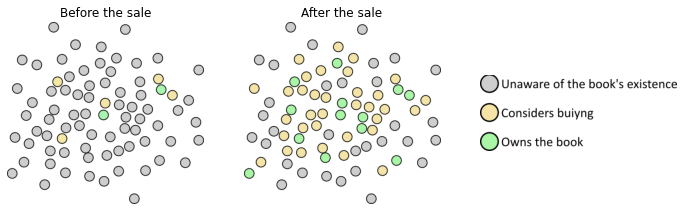

In [27]:
from sales_analysis import draw_recognition
display(HTML('<p style="text-align: right;"><a id="Figure-10">Figure 10</a></p>'))
draw_recognition()

I want to check in which countries the sale helped the book gain visibility and measure this effect with means ratio in before- and after-sale periods. This is another lengthy block of code I am substituting with an import.

In [28]:
from sales_analysis import GUS_stats_diff
display(HTML('<p style="text-align: right;"><a id="Figure-11">Figure 11</a>, '
             'referenced: <a href="#dataviz">1</a>, <a href="#Conclusion">2</a>, '
             'compare with <a href="#Figure-17">Sale 2</a></p>'))
GUS_stats_diff(sales[1], dates_sale1)

Once again, the distributions in each period are hidden to improve readability of the plot, they can be enabled by clicking on the squares in the legend. The **Gross Units Sold** daily mean relative change is provided at the bottom of the plot for the **countries** with statistically different distributions before and after the sale (described as *means change*).

We can see that the promotion increased the book's visibility in about 50% of the **countries** and that the effect is especially strong in Poland, where the full-price sales increased almost tenfold.

## Sale 2: data analysis and cleaning
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

We have gained enough insights into the Sale 1 data. Let's repeat the procedure for Sale 2 by first investigating the discounts:

In [29]:
sales[2]['discount'] = sales[2].apply(
    lambda r: round(100 - (r['Sale Price'] / r['Base Price']) * 100),
    axis=1
)
discounts = sales[2][['discount', 'Gross Units Sold']].groupby(['discount']).sum()
discounts.sort_values('Gross Units Sold', ascending=False, inplace=True)
display(discounts)
# discounts.index holds 'discount' data and discounts.values contains GUS data
discounts = [disc for disc, GUS in zip(discounts.index, discounts.values) if GUS>0]
display(discounts)

# Sale 2 unique dates
dates_u = sales[2]['Date'].unique()

fig = go.Figure()
temp_df = fill_missing(sales[2])
temp_df = fill_missing(temp_df)
temp_df = to_plot(temp_df)
fig.add_trace(go.Scatter(x=temp_df['Date'],
                         y=temp_df['sum Gross Units Sold'],
                         mode='lines',
                         name='total',
                         line_color='black',
                         line_dash='dash',
                         hovertemplate='<b>%{x}, Gross Units Sold (total): %{y}'
                        ))

for disc in discounts:
    temp_df = sales[2].loc[(sales[2]['discount'] == disc) & (sales[2]['Gross Units Sold'] != 0)]
    temp_df = fill_missing(temp_df)
    temp_df = to_plot(temp_df)
    fig.add_trace(go.Scatter(
        x=temp_df['Date'],
        y=temp_df['sum Gross Units Sold'],
        mode='lines+markers',
        name=f'-{disc:.0f}%', customdata=temp_df[['Countries']],
        hovertemplate='<b>%{x}, Gross Units Sold (' + f'{disc:.0f}' + '% off): %{y}<BR><b>Countries</b>: %{customdata[0]}'
    ))
    
fig.update_layout(
    title_text='<b>Gross Units Sold</b> per <b>discount</b> during <b>Sale 2<b>',
    title_x=0.5,
    yaxis_title_text='Gross Units Sold',
    xaxis_title_text='Date',
)
display(HTML('<p style="text-align: right;"><a id="Figure-12">Figure 12</a>, '
             'referenced: <a href="#dataviz">1</a>, <a href="#Conclusion">2</a></p>'))
fig.show()

,Gross Units Sold
discount,
40,30337
0,12383
42,1450
50,266
75,241
45,51
15,40
74,39
77,16


[40, 0, 42, 50, 75, 45, 15, 74, 77, 53, 33, 32, 41]

Similarly to Sale 1, we have to remove data that doesn't belong to the main sale, nor has the full-price. However, an aggregation problem exists here! The data for -42% **discount** belongs exclusively to Australia and spans over the main promotion period. This means that due to currency differences, the main **discount** in Australia was slightly higher than in other **countries**, where it equals to -40%. For simplicity, I will just replace all instances of 42% **discount** with 40%:

In [30]:
sales[2]['discount'] = sales[2].apply(lambda r: r['discount'] if r['discount'] != 42 else 40, axis=1)

Let's extract the sale boundary dates and clean the data:

In [31]:
dates_sale2 = {'start': sales[2]['Date'].min(),
               'sale_start': pd.Timestamp('2017-12-21 00:00:00'),
               'sale_end': pd.Timestamp('2018-01-03 00:00:00'),
               'end': sales[2]['Date'].max()}

sales[2]['Period'] = sales[2].apply(lambda r: 'before sale' if r['Date']<dates_sale2['sale_start'] else
                                              'after sale' if r['Date']>dates_sale2['sale_end'] else
                                              'during sale', axis=1)
sales[2] = sales[2].set_index(['Period', 'discount'])
sales[2] = sales[2].loc[[('before sale', 0), ('during sale', discounts[0]), ('after sale', 0)]].reset_index()

## Sale 2: performance analysis
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

In the case of the second sale I will also start with plotting the total **Gross Units Sold** per day.

In [32]:
s2_grouped = sales[2].groupby(['Period', 'Date']).sum().sort_index(level='Date')
fig = go.Figure()
# plot the total GUS per day
fig.add_trace(go.Scatter(x=s2_grouped.index.get_level_values('Date'),
                         y=s2_grouped['Gross Units Sold'],
                         mode='lines+markers',
                         name='Gross Units Sold',
                         line=dict(color='black', dash=None, width=1),
                         hovertemplate='%{y:.0f}',
                         marker_size=4
                        ))
# Create a dictionary to store Sale1 means
means_sale2 = {}
for period in ['before sale', 'during sale', 'after sale']:
    means_sale2[period] = mean_in_period = calculate_mean_in_period(s2_grouped, period, 'Gross Units Sold')
    fig.add_trace(go.Scatter(x=s2_grouped.loc[period].index.get_level_values('Date'),
                             y=[mean_in_period] * len(s2_grouped.loc[period]),
                             mode='lines',
                             name='24H mean ' + period,
                             line=dict(color=colors[period],dash=None, width=2),
                             marker_size=4,
                             hovertemplate='%{y:.0f}'
                            ))
span_shape = dict(type='rect',
                  xref='x',
                  yref='paper',
                  x0=dates_sale2['sale_start'],
                  y0=0,
                  x1=dates_sale2['sale_end'],
                  y1=1,
                  opacity=0.2,
                  line=dict(width=0),
                  fillcolor='green'
                 )
fig.update_layout(
    shapes=[span_shape],
    title_text='<b>Performance</b> before, during and after <b>Sale 2</b>',
    title_x=0.5,
    yaxis_title_text='Gross Units Sold',
    xaxis_title_text='Date',
    hovermode="x unified",
    )
fig.add_annotation(text=f'{discounts[0]}% off',
                   y=0.2,
                   opacity=0.5,
                   x=dates_sale2['sale_start'] + (dates_sale2['sale_end'] - dates_sale2['sale_start']) / 2,
                   yref='paper',
                   align='left',
                   textangle=-30,
                   showarrow=False,
                   font=dict(color="darkgreen", size=30)
                  )
display(HTML('<p style="text-align: right;"><a id="Figure-13">Figure 13</a>, '
             'compare with <a href="#Figure-4">Sale 1</a></p>'))
fig.show()

Let's conclude this plot with a couple of gauge-indicators:

In [33]:
from sales_analysis import plot_gauge2

display(HTML('<p style="text-align: right;"><a id="Figure-14">Figure 14</a>, '
             'referenced: <a href="#Conclusion">1</a></p>'))
fig = go.Figure()
plot_gauge2(fig, means_sale1, means_sale2, 'Gross Units Sold')

means_sale2_GS = {}
for period in ['before sale', 'during sale', 'after sale']:
    means_sale2_GS[period] = mean_in_period = calculate_mean_in_period(s2_grouped, period, 'Gross Sales (USD)')
plot_gauge2(fig, means_sale1_GS, means_sale2_GS, 'Gross Sales (USD)')
fig.update_layout(width=900, height=500)
fig.show()

On average, 9.4 times more books were sold daily during the promotion than right before it, which is a 59% decrease with respect to the first sale. This results in about 5.3 days of out-of-sale income during each day of the promotion, 66% less than during sale 1. The additional percentage reduction in the case of **Gross Sales** is a consequence of a higher discount (40% vs 32% off in the second and first sales respectively).

## Sale 2: performance in individual countries
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

The **Gross Units Sold** data on the world-map:

In [34]:
from sales_analysis import choropleth2
display(HTML('<p style="text-align: right;"><a id="Figure-15">Figure 15</a>, '
             'compare with <a href="#Figure-7">Sale 1</a></p>'))
choropleth2(sales[2], country_codes, pop_data)

The most significant differences, with respect to the first sale, are: very high number of **Gross Units Sold** in Poland, and disappearance of Iceland (**Gross Units Sold** = 0), which had the highest **Gross Units Sold** per 1M pop. during Sale 1. Other than this, the data appears relatively similar.

The **Gross Units Sold** relative daily mean change between the before- and during-sale **periods** for each **country**:

In [35]:
display(HTML('<p style="text-align: right;"><a id="Figure-16">Figure 16</a>, '
             'compare with <a href="#Figure-8">Sale 1</a></p>'))
GUS_rel_ch(sales[2], dates_sale2)

Once again the global **Gross Units Sold** average is mostly dictated by the sales in the US.

What about the book's recognition, did the second sale increase its visibility?

In [36]:
display(HTML('<p style="text-align: right;"><a id="Figure-17">Figure 17</a>, '
             'referenced: <a href="#Conclusion">1</a>, '
             'compare with <a href="#Figure-11">Sale 1</a></p>'))
GUS_stats_diff(sales[2], dates_sale2)

This time the visibility increase was much less spectacular, with only about 25% of the **countries** experiencing a small statistically significant increase.

## Conclusion
<p style='text-align: right;'>[Go back to the <a href="#Contents:">Table of Contents</a>]</p>

- **Sale 1** performance was great with average daily **Gross Units Sold increase of 2300%** ([Fig. 5](#Figure-5)).
- **One day during Sale 1** generated as much income as **15.6 days before the sale** ([Fig. 6](#Figure-6)).
- **Sale 1 had visible impact on the book's visibility** ([Fig. 11](#Figure-11)).
- **Sale 2** also resulted in **average daily Gross Units Sold increase**, but only **of 940%** ([Fig. 14](#Figure-14)).
- **Sale 2** performance was **59% worse than Sale 1**, yielding **66% lower daily income** ([Fig. 14](#Figure-14)).
- **Sale 2 had limited impact on the book's visibility** ([Fig. 17](#Figure-17)).

It appears that the book had a popularity spike during Sale 1, which contributed greatly to that sale's performance and increased sales even after the promotion. The limited success of Sale 2 might be caused by a lack of such visibility increase and majority of the purchases could be made by people that wanted to buy the book, but were waiting for a discount.

There is a steady flow of new daily purchases and possibly of people discovering the book, but waiting for a promotion to buy it. I would recommend a discount increase for the next big sale, setting it at the *magical 50%* might be the trigger needed for the hesitant to open their wallets.

Additionally, boosting visibility during, or just before a sale could benefit it's performance. It appears that some promotion event took place during 7-9 December 2017 (as seen in [Fig. 12](#Figure-12)), but it might have been done too early, or had too small impact.